<a href="https://colab.research.google.com/github/rajguru9889/ML_LAB/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer , load_wine
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , r2_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor , AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor , BaggingClassifier , VotingClassifier)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

Write a program that demonstrates the advantage of ensemble learning compared to a
single classifier.

(569, 30)
(569,)

decision tree result

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Random forest ensemble

n_estimators | Accuracy | Precision | Recall | F1-Score
           2 | 0.939 | 0.985 | 0.915 | 0.949
           4 | 0.939 | 0.957 | 0.944 | 0.950
           6 | 0.947 | 0.958 | 0.958 | 0.958
           8 | 0.947 | 0.958 | 0.958 | 0.958
          10 | 0.956 | 0.958 | 0.972 | 0.965
          12 | 0.956 | 0.958 | 0.972 | 0.965
          14 | 0.956 | 0.958 | 0.972 | 0.965
          16 | 0.965 | 0.959 | 0.986 | 0.972
          18 | 0.965 | 0.959 | 0.986 | 0.972
          20 | 0.965 | 0.959 | 0.986 | 0.972
          25 | 0.965 | 0.959 | 0.986 | 0.972
          30 | 0.965 | 0.959 | 0.986 | 0.972
          40 

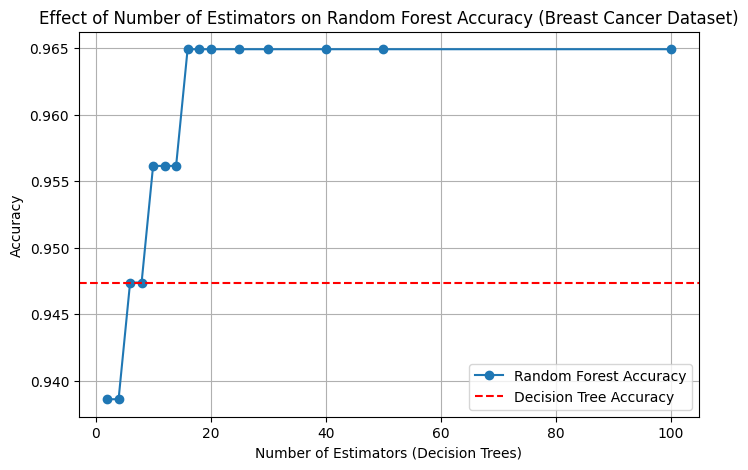

In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print(X.shape)
print(y.shape)

#preprocessing
X = X.fillna(X.mean())

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


#decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_acc = metrics.accuracy_score(y_test, y_pred_dt)
dt_prec = metrics.precision_score(y_test, y_pred_dt)
dt_rec = metrics.recall_score(y_test, y_pred_dt)
dt_f1 = metrics.f1_score(y_test, y_pred_dt)

print("\ndecision tree result\n")
print(metrics.classification_report(y_test, y_pred_dt))

#ensemble
estimators = [2,4,6,8,10,12,14,16,18,20,25,30,40,50,100]
rf_results = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n ,random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred_rf)
    prec = metrics.precision_score(y_test, y_pred_rf)
    rec = metrics.recall_score(y_test, y_pred_rf)
    f1 = metrics.f1_score(y_test, y_pred_rf)

    rf_results.append([n, acc, prec, rec, f1])

rf_results = np.array(rf_results)

print("Random forest ensemble\n")
print("n_estimators | Accuracy | Precision | Recall | F1-Score")
for row in rf_results:
    print(f"{int(row[0]):>12} | {row[1]:.3f} | {row[2]:.3f} | {row[3]:.3f} | {row[4]:.3f}")

print()
plt.figure(figsize=(8,5))
plt.plot(rf_results[:,0], rf_results[:,1], marker='o', label='Random Forest Accuracy')
plt.axhline(y=dt_acc, color='r', linestyle='--', label='Decision Tree Accuracy')
plt.title("Effect of Number of Estimators on Random Forest Accuracy (Breast Cancer Dataset)")
plt.xlabel("Number of Estimators (Decision Trees)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Implementing Simple Ensemble Techniques


In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


model1 = LogisticRegression(max_iter=1000, random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier(n_neighbors=5)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)


pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)


preds = np.column_stack((pred1, pred2, pred3))


from scipy.stats import mode
max_vote_pred, _ = mode(preds, axis=1)
max_vote_pred = max_vote_pred.ravel()


prob1 = model1.predict_proba(X_test)
prob2 = model2.predict_proba(X_test)
prob3 = model3.predict_proba(X_test)

avg_prob = (prob1 + prob2 + prob3) / 3
avg_vote_pred = np.argmax(avg_prob, axis=1)


acc1 = metrics.accuracy_score(y_test, pred1)
acc2 = metrics.accuracy_score(y_test, pred2)
acc3 = metrics.accuracy_score(y_test, pred3)

weights = np.array([acc1, acc2, acc3])
weighted_prob = (prob1 * weights[0] + prob2 * weights[1] + prob3 * weights[2]) / np.sum(weights)
weighted_vote_pred = np.argmax(weighted_prob, axis=1)


def evaluate(y_true, y_pred, method_name):
    acc = metrics.accuracy_score(y_true, y_pred)
    prec = metrics.precision_score(y_true, y_pred)
    rec = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    print(f"{method_name:25s} | Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")

print("Individual Model Results:")
evaluate(y_test, pred1, "Logistic Regression")
evaluate(y_test, pred2, "Decision Tree")
evaluate(y_test, pred3, "KNN")
print()
print("Ensemble Technique Results:")
evaluate(y_test, max_vote_pred, "Max Voting")
evaluate(y_test, avg_vote_pred, "Average Voting")
evaluate(y_test, weighted_vote_pred, "Weighted Average Voting")


Individual Model Results:
Logistic Regression       | Accuracy: 0.982 | Precision: 0.981 | Recall: 0.991 | F1: 0.986
Decision Tree             | Accuracy: 0.918 | Precision: 0.935 | Recall: 0.935 | F1: 0.935
KNN                       | Accuracy: 0.971 | Precision: 0.955 | Recall: 1.000 | F1: 0.977

Ensemble Technique Results:
Max Voting                | Accuracy: 0.971 | Precision: 0.955 | Recall: 1.000 | F1: 0.977
Average Voting            | Accuracy: 0.959 | Precision: 0.939 | Recall: 1.000 | F1: 0.968
Weighted Average Voting   | Accuracy: 0.959 | Precision: 0.939 | Recall: 1.000 | F1: 0.968


Hard Voting vs. Soft Voting Classifiers

In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=5)

base_learners = [('LogReg', clf1), ('DecisionTree', clf2), ('KNN', clf3)]

hard_voting_clf = VotingClassifier(estimators=base_learners, voting='hard')
hard_voting_clf.fit(X_train, y_train)
y_pred_hard = hard_voting_clf.predict(X_test)

soft_voting_clf = VotingClassifier(estimators=base_learners, voting='soft')
soft_voting_clf.fit(X_train, y_train)
y_pred_soft = soft_voting_clf.predict(X_test)

def evaluate(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name:20s} | Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")

print("📊 Individual Base Learners:")
for name, model in base_learners:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate(y_test, y_pred, name)

print("\n🤝 Ensemble Learning:")
evaluate(y_test, y_pred_hard, "Hard Voting")
evaluate(y_test, y_pred_soft, "Soft Voting")

📊 Individual Base Learners:
LogReg               | Accuracy: 0.982 | Precision: 0.981 | Recall: 0.991 | F1: 0.986
DecisionTree         | Accuracy: 0.918 | Precision: 0.935 | Recall: 0.935 | F1: 0.935
KNN                  | Accuracy: 0.971 | Precision: 0.955 | Recall: 1.000 | F1: 0.977

🤝 Ensemble Learning:
Hard Voting          | Accuracy: 0.971 | Precision: 0.955 | Recall: 1.000 | F1: 0.977
Soft Voting          | Accuracy: 0.959 | Precision: 0.939 | Recall: 1.000 | F1: 0.968


Exploring Bagging Technique (Random Forest)

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

experiments = [
    {"n_estimators": 10, "max_depth": None, "random_state": 0},
    {"n_estimators": 50, "max_depth": None, "random_state": 0},
    {"n_estimators": 100, "max_depth": None, "random_state": 42},
    {"n_estimators": 100, "max_depth": 5, "random_state": 0},
    {"n_estimators": 100, "max_depth": 10, "random_state": 0},
    {"n_estimators": 200, "max_depth": 10, "random_state": 42}
]

results = []

for params in experiments:
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        "n_estimators": params["n_estimators"],
        "max_depth": params["max_depth"],
        "accuracy": acc
    })


df = pd.DataFrame(results)
print("Model Performance Comparison:\n")
print(df)

best_model = df.loc[df['accuracy'].idxmax()]
print("\nBest Model Configuration:")
print(best_model)

Model Performance Comparison:

   n_estimators  max_depth  accuracy
0            10        NaN  0.964912
1            50        NaN  0.970760
2           100        NaN  0.970760
3           100        5.0  0.964912
4           100       10.0  0.970760
5           200       10.0  0.970760

Best Model Configuration:
n_estimators    50.00000
max_depth            NaN
accuracy         0.97076
Name: 1, dtype: float64


Using RandomForestRegressor and OOB Score

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"OOB Score (on training data): {model.oob_score_:.4f}")
print(f"R² Score (on test data): {r2:.4f}")
print(f"Mean Squared Error: {mse:.6f}")


OOB Score (on training data): 0.8494
R² Score (on test data): 0.8605
Mean Squared Error: 0.032761


Exploring Boosting Techniques

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Ada Boost Classifier")
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=0.5,
    random_state=42
)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}\n")

print("Gradient Boostung Classifier")
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

print(f"Accuracy: {acc_gb:.4f}\n")

print("Gradient Bossting Regression")
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gb_reg.fit(X_train, y_train)

yr_pred = gb_reg.predict(X_test)

mse = mean_squared_error(y_test, yr_pred)
r2 = r2_score(y_test, yr_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Ada Boost Classifier
Accuracy: 0.9649

Gradient Boostung Classifier
Accuracy: 0.9591

Gradient Bossting Regression
Mean Squared Error: 0.03
R² Score: 0.8658


Comparative Study of Ensemble Models


 Comparative Results:
            Model  Train Accuracy  Test Accuracy  Overfitting Gap
    Random Forest          1.0000         0.9649           0.0351
         AdaBoost          1.0000         0.9649           0.0351
     Bagging (DT)          0.9978         0.9561           0.0417
Gradient Boosting          1.0000         0.9561           0.0439


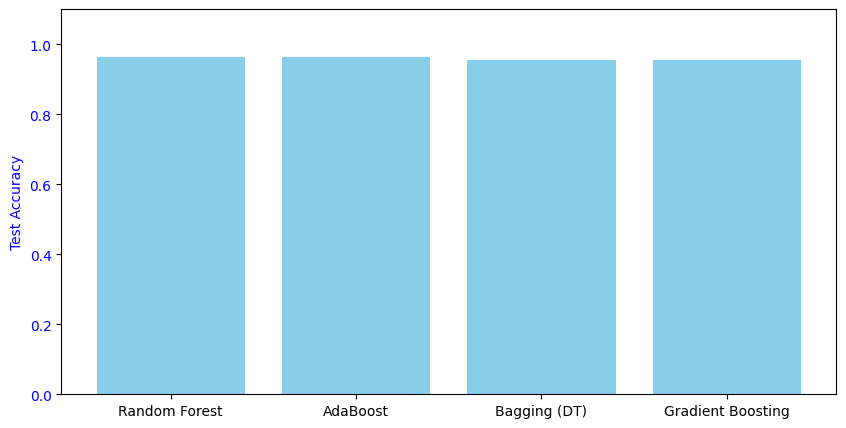

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Bagging (DT)": BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=50,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=50,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        random_state=42
    )
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    overfit = train_acc - test_acc

    results.append({
        "Model": name,
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4),
        "Overfitting Gap": round(overfit, 4)
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="Test Accuracy", ascending=False)
print("\n Comparative Results:")
print(df_results.to_string(index=False))

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(df_results['Model'], df_results['Test Accuracy'], color='skyblue', label='Test Accuracy')
ax1.set_ylabel('Test Accuracy', color='blue')
ax1.set_ylim(0, 1.1)
ax1.tick_params(axis='y', labelcolor='blue')



Visualizing the Ensemble models

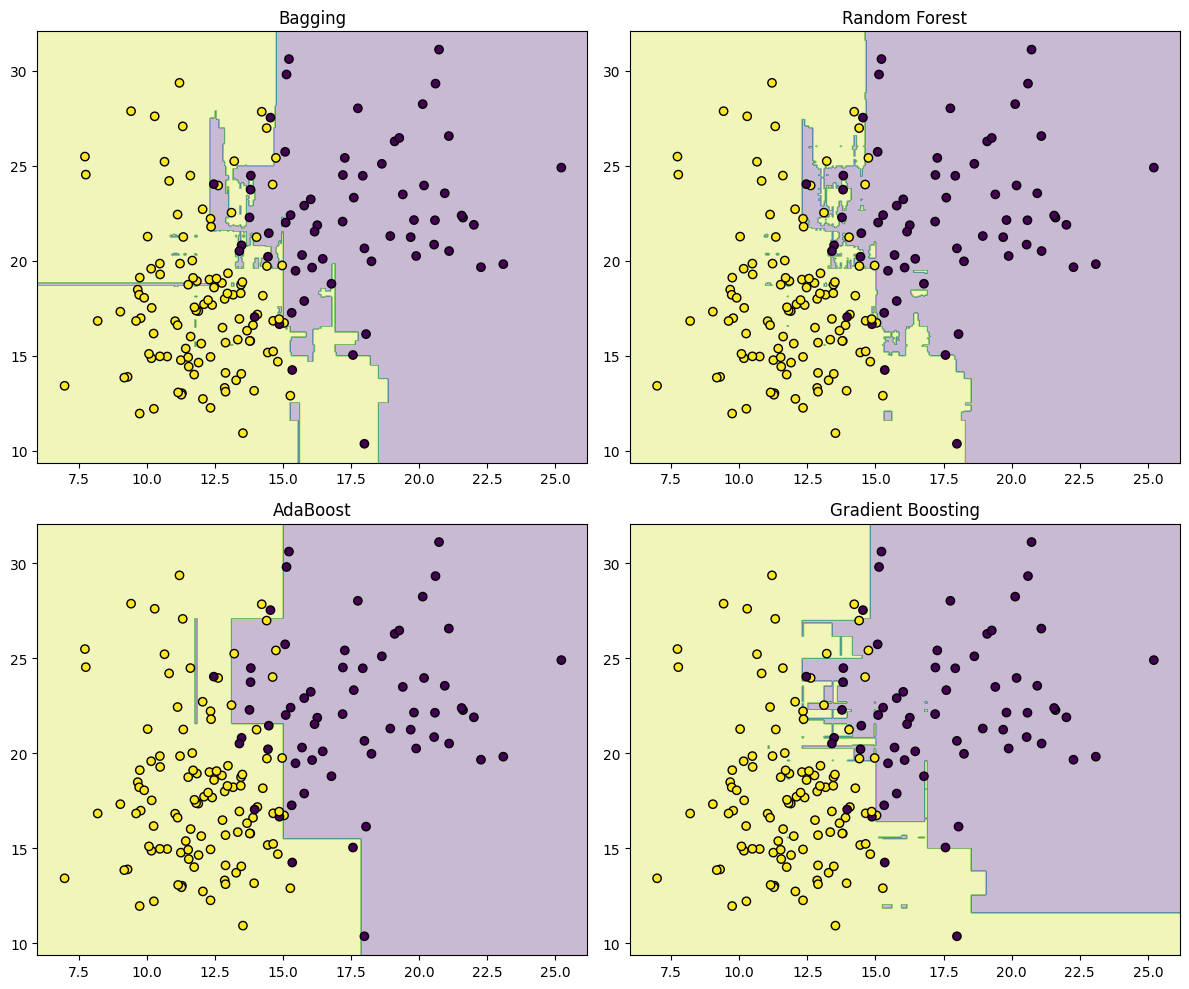


 Accuracy with Missing Data:
Bagging: Accuracy = 0.9591
Random Forest: Accuracy = 0.9649
AdaBoost: Accuracy = 0.9649
Gradient Boosting: Accuracy = 0.9591

Random Forest feature importances:
mean radius: 0.0581
mean texture: 0.0129
mean perimeter: 0.0526
mean area: 0.0490
mean smoothness: 0.0072
mean compactness: 0.0102
mean concavity: 0.0694
mean concave points: 0.1253
mean symmetry: 0.0030
mean fractal dimension: 0.0037
radius error: 0.0185
texture error: 0.0039
perimeter error: 0.0115
area error: 0.0375
smoothness error: 0.0035
compactness error: 0.0060
concavity error: 0.0060
concave points error: 0.0039
symmetry error: 0.0028
fractal dimension error: 0.0084
worst radius: 0.0467
worst texture: 0.0244
worst perimeter: 0.0812
worst area: 0.1161
worst smoothness: 0.0079
worst compactness: 0.0170
worst concavity: 0.0528
worst concave points: 0.1370
worst symmetry: 0.0153
worst fractal dimension: 0.0081

Gradient Boosting feature importances:
mean radius: 0.0002
mean texture: 0.0102
mea

In [ ]:
data = load_breast_cancer()
X_full = data.data
y = data.target

X = X_full[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(12,10))
for ax, (name, model) in zip(axes.ravel(), models.items()):
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_test, y_test, ax, name)
plt.tight_layout()
plt.show()

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.3, random_state=42)

rng = np.random.default_rng(42)
X_train_missing = X_train_full.copy()
mask = rng.random(X_train_missing.shape) < 0.1
X_train_missing[mask] = np.nan

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_missing)
X_test_imputed = imputer.transform(X_test_full)

print("\n Accuracy with Missing Data:")
for name, model in models.items():
    model.fit(X_train_imputed, y_train_full)
    y_pred = model.predict(X_test_imputed)
    acc = accuracy_score(y_test_full, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")


for name in ["Random Forest", "Gradient Boosting"]:
    model = models[name]
    importances = model.feature_importances_
    print(f"\n{name} feature importances:")
    for i, val in enumerate(importances):
        print(f"{data.feature_names[i]}: {val:.4f}")